In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import regex as re

from sklearn.mixture import GaussianMixture

In [50]:
path = os.getcwd()
prospects = pd.DataFrame(columns=['Rank', 'Name', 'Avg', 'Draft Year'])
for year in range(2016, 2023):
    df = pd.read_csv(os.path.join(path, f'data\\big_boards\\{year}_big_board.csv'))
    # Two players only having one ranking in the top 107 for 2018
    if year == 2018:
        df = df.drop([70, 88])
    df = df.iloc[:107]
    df['Draft Year'] = year
    df = df[['Rank', 'Name', 'SD','Avg', 'Draft Year']]
    prospects = pd.concat([prospects, df])
prospects = prospects.sort_values(by=['Rank', 'Draft Year']).reset_index(drop=True)
prospects['SD'] = pd.to_numeric(prospects['SD'])

In [52]:
vals = np.array(prospects[['SD', 'Avg']])
gm = GaussianMixture(n_components=20, random_state=32).fit(vals)
prospects['Cluster'] = gm.predict(vals)

In [53]:
cluster_order = []
for i in prospects['Cluster']:
    if i in cluster_order:
        continue
    else:
        cluster_order.append(i)
cluster_order
prospects['Cluster'] = prospects['Cluster'].apply(lambda x: cluster_order.index(x))

In [17]:
prospects.head(40)

Rank               Name    Avg Draft Year  Cluster
0     1      Laremy Tunsil   2.56       2016        0
1     1      Myles Garrett   1.00       2017        0
2     1     Saquon Barkley   2.67       2018        0
3     1          Nick Bosa   1.93       2019        0
4     1        Chase Young   1.31       2020        0
5     1    Trevor Lawrence   1.00       2021        0
6     1   Aidan Hutchinson   2.65       2022        0
7     2         Myles Jack   3.44       2016        0
8     2        Jamal Adams   5.22       2017        0
9     2     Quenton Nelson   3.17       2018        0
10    2   Quinnen Williams   2.53       2019        0
11    2         Joe Burrow   3.13       2020        0
12    2         Kyle Pitts   2.88       2021        0
13    2          Evan Neal   3.88       2022        0
14    3       Jalen Ramsey   4.00       2016        0
15    3     Jonathan Allen   5.67       2017        0
16    3      Bradley Chubb   3.92       2018        0
17    3         Josh Allen   5.47       2019        0
18    3        Jeff Okudah   3.75       2020        0
19    3       Penei Sewell   4.38       2021        0
20    3  Kayvon Thibodeaux   4.71       2022        0
21    4    Ezekiel Elliott   4.78       2016        0
22    4  Marshon Lattimore   6.11       2017        0
23    4       Roquan Smith   7.42       2018        0
24    4          Ed Oliver   5.80       2019        0
25    4     Isaiah Simmons   4.44       2020        0
26    4      Ja'Marr Chase   4.44       2021        0
27    4        Ikem Ekwonu   4.76       2022        0
28    5          Joey Bosa   5.33       2016        0
29    5     Solomon Thomas   6.33       2017        0
30    5         Josh Rosen   8.08       2018        1
31    5        Devin White   8.47       2019        1
32    5     Tua Tagovailoa   5.25       2020        0
33    5      Justin Fields   5.94       2021        0
34    5      Ahmad Gardner   5.65       2022        0
35    6   DeForest Buckner   7.78       2016        1
36    6  Leonard Fournette   6.89       2017        0
37    6       Derwin James   8.08       2018        1
38    6     Jonah Williams  11.07       2019        1
39    6      Derrick Brown   6.81       2020        0

In [18]:
prospects[['Avg', 'Draft Year', 'Cluster']]

Avg  Cluster
0      2.56        0
1      1.00        0
2      2.67        0
3      1.93        0
4      1.31        0
..      ...      ...
744  110.50       18
745  116.55       19
746  114.38       19
747  121.30       19
748  112.21       18

[749 rows x 2 columns]

In [54]:
prospects_plot = prospects[['Rank', 'Draft Year', 'Cluster']]
prospects_plot = prospects_plot.pivot(index='Rank', columns='Draft Year', values = 'Cluster')

In [22]:
prospects_plot

Rank        1    2    3    4    5    6    7    8    9    10   ...  98   99    
Draft Year                                                    ...             
2016          0    0    0    0    0    1    1    1    1    1  ...   18   19  \
2017          0    0    0    0    0    0    0    1    1    1  ...   17   17   
2018          0    0    0    0    1    1    1    1    1    1  ...   16   16   
2019          0    0    0    0    1    1    1    1    1    1  ...   18   18   
2020          0    0    0    0    0    0    1    1    1    1  ...   16   16   
2021          0    0    0    0    0    0    1    1    1    1  ...   18   18   
2022          0    0    0    0    0    0    1    1    1    1  ...   16   16   

Rank        100  101  102  103  104  105  106  107  
Draft Year                                          
2016         19   19   19   19   19   19   19   19  
2017         17   16   16   16   18   18   18   18  
2018         16   18   18   18   18   18   18   18  
2019         18   18   19   19   19   19   19   19  
2020         16   18   18   18   18   18   18   19  
2021         18   18   19   19   19   19   19   19  
2022         16   16   18   18   18   18   18   18  

[7 rows x 107 columns]

<Axes: xlabel='Rank'>

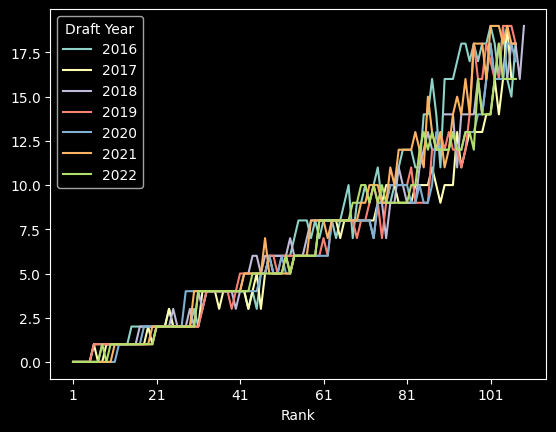

In [55]:
prospects_plot.plot()

In [56]:
df_agg = prospects.groupby(['Cluster', 'Draft Year'])['Cluster'].count()
df_agg.head(21)

Cluster  Draft Year
0        2016           5
         2017           7
         2018           7
         2019           5
         2020          11
         2021          10
         2022           8
1        2016           9
         2017          12
         2018           9
         2019          15
         2020           6
         2021           9
         2022          12
2        2016          15
         2017          11
         2018          12
         2019          11
         2020          10
         2021          10
         2022          10
Name: Cluster, dtype: int64

In [7]:
df_agg = pd.Series.to_frame(df_agg)
df_agg = df_agg.rename(columns={'Cluster': 'count'})
df_agg = df_agg.reset_index()

In [16]:
df_agg.loc[df_agg['Draft Year'] == 2017]

Cluster  Draft Year  count
1          0        2017      7
8          1        2017      3
15         2        2017      7
22         3        2017      5
29         4        2017      7
36         5        2017      6
43         6        2017      9
50         7        2017      5
57         8        2017      5
64         9        2017      2
71        10        2017     10
78        11        2017      6
85        12        2017      4
91        13        2017     10
98        14        2017      6
105       15        2017      4
112       16        2017      3
118       17        2017      4
125       18        2017      4

In [8]:
df_agg.head(40)

Cluster  Draft Year  count
0         0        2016      5
1         0        2017      7
2         0        2018      4
3         0        2019      4
4         0        2020      6
5         0        2021      6
6         0        2022      6
7         1        2016      5
8         1        2017      3
9         1        2018      6
10        1        2019      6
11        1        2020      8
12        1        2021      6
13        1        2022      6
14        2        2016      3
15        2        2017      7
16        2        2018      3
17        2        2019      8
18        2        2020      3
19        2        2021      5
20        2        2022      6
21        3        2016      5
22        3        2017      5
23        3        2018      9
24        3        2019      5
25        3        2020      4
26        3        2021      3
27        3        2022      5
28        4        2016      9
29        4        2017      7
30        4        2018      6
31        4        2019      3
32        4        2020      3
33        4        2021      8
34        4        2022      6
35        5        2016     12
36        5        2017      6
37        5        2018      7
38        5        2019      9
39        5        2020     13

In [38]:
#load the data
path = os.getcwd()
#load big boards
df_2016 = pd.read_csv(os.path.join(path, 'data\\big_boards\\2016_big_board.csv'))
df_2016 = df_2016.drop('Unnamed: 0', axis=1)
df_2016 = df_2016.loc[df_2016['Rank'] < 108]
df_2016['Draft Year'] = 2016
df_2017 = pd.read_csv(os.path.join(path, 'data\\big_boards\\2017_big_board.csv'))
df_2017 = df_2017.drop('Unnamed: 0', axis=1)
df_2017 = df_2017.loc[df_2017['Rank'] < 108]
df_2017['Draft Year'] = 2017
df_2018 = pd.read_csv(os.path.join(path, 'data\\big_boards\\2018_big_board.csv'))
df_2018 = df_2018.drop('Unnamed: 0', axis=1)
df_2018['Position'] = df_2018['Position'].apply(lambda x: re.sub(' .*', '', x))
df_2018 = df_2018.loc[df_2018['Rank'] < 108]
df_2018['Draft Year'] = 2018
df_2019 = pd.read_csv(os.path.join(path, 'data\\big_boards\\2019_big_board.csv'))
df_2019 = df_2019.drop('Unnamed: 0', axis=1)
df_2019['Position'] = df_2019['Position'].apply(lambda x: re.sub(' .*', '', x))
df_2019 = df_2019.loc[df_2019['Rank'] < 108]
df_2019['Draft Year'] = 2019
df_2020 = pd.read_csv(os.path.join(path, 'data\\big_boards\\2020_big_board.csv'))
df_2020 = df_2020.drop('Unnamed: 0', axis=1)
df_2020['Position'] = df_2020['Position'].apply(lambda x: re.sub(' .*', '', x))
df_2020 = df_2020.loc[df_2020['Rank'] < 108]
df_2020['Draft Year'] = 2020
df_2021 = pd.read_csv(os.path.join(path, 'data\\big_boards\\2021_big_board.csv'))
df_2021 = df_2021.drop('Unnamed: 0', axis=1)
df_2021['Position'] = df_2021['Position'].apply(lambda x: re.sub(' .*', '', x))
df_2021 = df_2021.loc[df_2021['Rank'] < 108]
df_2021['Draft Year'] = 2021
df_2022 = pd.read_csv(os.path.join(path, 'data\\big_boards\\2022_big_board.csv'))
df_2022 = df_2022.drop('Unnamed: 0', axis=1)
df_2022['Position'] = df_2022['Position'].apply(lambda x: re.sub(' .*', '', x))
df_2022 = df_2022.loc[df_2022['Rank'] < 108]
df_2022['Draft Year'] = 2022
df_2023 = pd.read_csv(os.path.join(path, 'data\\big_boards\\2023_big_board.csv'))
df_2023 = df_2023.drop('Unnamed: 0', axis=1)
df_2023['Position'] = df_2023['Position'].apply(lambda x: re.sub(' .*', '', x))
df_2023 = df_2023.loc[df_2023['Rank'] < 108]
df_2023['Draft Year'] = 2023
#load the draft value charts
df_otc = pd.read_csv(os.path.join(path, 'data\\trade_value_charts\\fitzgerald-spielberger_trade_value_chart.csv'))
#load pfr roster data
df_roster = pd.read_csv(os.path.join(path, 'data\\player_value\\pfr_av_only.csv'))

In [39]:
df_2018.iloc[65:105]

Rank Position                   Name  BR  CBS  TDN   DT ESPN  NBC  NFL   
65     66       RB          Rashaad Penny   –  123  107   92   47   74   44  \
66     67       CB           M.J. Stewart   –   66   85   70   92   77   64   
67     68       RB        Kerryon Johnson   –   74   84   74   79   86   50   
68     69       LB          Uchenna Nwosu   –   79    –   48   49   73   75   
69     70       TE           Mark Andrews   –   72   62   78   80  123   97   
70     71       OT         Brandon Packer   –    –    –    –    –    –    –   
71     72       WR             D.J. Chark   –    –  101   68   48   64   56   
72     73       OT          Jamarco Jones  46   81   20  191  108   70   80   
73     74       WR  Equanimeous St. Brown   –  122  108   96  139   48   65   
74     75       LB        Malik Jefferson  28   60   95   97   78  149  127   
75     76       OT      Chukwuma Okorafor   –   37   24   54  114  135  117   
76     77       ED          Rasheem Green   –  104  135   81   63  100   54   
77     78      IDL             Tim Settle   –   57  136   95  106  146   42   
78     79       LB         Darius Leonard   –   48   63   85   67   81   48   
79     80       LB           Jerome Baker   –  124   51   79   68   69   95   
80     81       WR           Dante Pettis   –  146   78   66   71  119   73   
81     82       OT        Martinas Rankin   –   56   96  100   88  128   71   
82     83       ED           Kemoko Turay   –    –  124  179   73   57   63   
83     84       ED           Duke Ejiofor   –   65   40  210  170   79   88   
84     85       WR              Deon Cain   –  115  133   56  107  118   58   
85     86       WR       DaeSean Hamilton   –  111  115  144   82   55   84   
86     87       CB            Duke Dawson   –    –   99   84   70   78   90   
87     88      IDL          Derrick Nnadi   –   78   87  104   60  130   77   
88     89       CB      Kris Weatherspoon   –    –    –    –    –    –    –   
89     90       CB        Anthony Averett  50    –    –   73   84  148   96   
90     91       TE             Ian Thomas   –  139    –   89  101   85   40   
91     92        S            Kyzir White   –  126  111   53  116  104   60   
92     93       LB            Fred Warner   –   90   37  218   98   43  101   
93     94       RB          Royce Freeman   –   59  145   67   90  179  139   
94     95       CB            Nick Nelson   –    –    –  129   85  105  120   
95     96        S         DeShon Elliott   –   93   72  103  130  143  203   
96     97       CB           Isaac Yiadom   –    –    –   76  122  106   99   
97     98      IDL              B.J. Hill   –   89    –   91   58  155  134   
98     99       LB           Josey Jewell   –    –    –   69   91   92  190   
99    100       OG           Wyatt Teller   –  130   83   80  137  115  105   
100   101       CB            Holton Hill   –   41   67  101   74  102  133   
101   102       OT       Desmond Harrison   –  119  116   71  103   94   82   
102   103       LB        Dorian O'Daniel   –   31   88  142  149   61  118   
103   104      IDL          Deadrin Senat   –    –    –  139   77   59  110   
104   105       ED            Chad Thomas   –   77    –  155  162   88  104   

     PFF   SI  USA  WF Yahoo    SD     Avg  Draft Year  
65    29   72   36  90    94  30.9   73.45        2018  
66    70    –   69   –    76   9.2   74.33        2018  
67   107   52  104  47    61  20.5   74.36        2018  
68   110   65   75   –    97  20.1   74.56        2018  
69    48   67   53  52    93  22.6   75.00        2018  
70     –    –    –  76     –     –   76.00        2018  
71   113   82   62  99    71  21.5   76.40        2018  
72    32   93   85   –    73  45.3   79.91        2018  
73    66   75   79  37    45  32.9   80.00        2018  
74   114   76   50  63    43  36.0   81.67        2018  
75   160   49   46   –    91  46.9   82.70        2018  
76   143   50   72  67    53  32.6   83.82        2018  
77   103   57   66  35  

In [12]:
vals_2016 = np.array(df_2016[['Avg']])
gm_2016 = GaussianMixture(n_components=20, random_state=32).fit(vals_2016)
gm_2016.means_

array([[101.50245005],
       [ 38.09827174],
       [ 73.99755266],
       [  7.78      ],
       [116.90206096],
       [ 54.53183596],
       [ 27.90696477],
       [ 91.90013965],
       [ 80.16428685],
       [ 16.93434724],
       [109.78279198],
       [ 66.92618443],
       [ 32.66022239],
       [ 43.78046844],
       [ 60.84302171],
       [ 12.89116743],
       [ 70.01715994],
       [ 22.29097264],
       [105.79363783],
       [  4.02200232]])

In [13]:
df_2016['Cluster'] = gm_2016.predict(vals_2016)
df_2016.head(20)

Rank Position                   Name  BR ESPN NFL PFF SBN  SI USA  WF   
0      1       OT          Laremy Tunsil   4    2   1   5   2   3   1   1  \
1      2       LB             Myles Jack   2    8   2   6   4   2   4   2   
2      3       CB           Jalen Ramsey   1    3   8   3   3   1   3  11   
3      4       RB        Ezekiel Elliott   8    4   5   7   7   4   2   4   
4      5       ED              Joey Bosa   6    1  14   1   1   8   5   7   
5      6       ED       DeForest Buckner   7    6   3   2   6   6  27   3   
6      7       OT         Ronnie Stanley  11    5   6  16   8   5  31  12   
7      8      IDL        Sheldon Rankins  14   12  27   8  15  11   7  13   
8      9       CB  Vernon Hargreaves III  10   23  11  18  10  13  15   6   
9     10       QB             Jared Goff   5   11  12   4   5  14  42  15   
10    11       ED            Shaq Lawson  15   17  30  11  18  15   6  17   
11    12       QB           Carson Wentz   9   10  23  14   9   7  54   5   
12    13       WR       Laquon Treadwell  21   14  16  28  14  10  11  33   
13    14       LB         Reggie Ragland  26   18   9  26  16  20  20  10   
14    15       LB          Leonard Floyd  25    9  13  19  24  40  39   8   
15    16       WR          Corey Coleman  18   20  37   9  29  17  28  39   
16    17       WR           Josh Doctson  17   15  53  10  19  26  26  34   
17    18      IDL            Jarran Reed  27   19  26  20  17  39  21  28   
18    19       ED            Noah Spence  13   56  24  36  21  12   8  43   
19    20      IDL        Andrew Billings  21   45  21  22  44  23  30  24   

   Yahoo    SD    Avg  Draft Year  Cluster  
0      4   1.5   2.56        2016       19  
1      1   2.3   3.44        2016       19  
2      3   3.3   4.00        2016       19  
3      2   2.2   4.78        2016       19  
4      5   4.2   5.33        2016       19  
5     10   7.6   7.78        2016        3  
6      9   8.2  11.44        2016       15  
7      6   6.3  12.56        2016       15  
8     11   5.0  13.00        2016       15  
9     22  11.8  14.44        2016       15  
10    15   6.4  16.00        2016        9  
11    23  15.3  17.11        2016        9  
12    12   8.0  17.67        2016        9  
13    39   9.2  20.44        2016       17  
14    20  11.6  21.89        2016       17  
15     8  11.2  22.78        2016       17  
16    13  13.3  23.67        2016       17  
17    28   6.7  25.00        2016        6  
18    24  15.9  26.33        2016        6  
19     7  11.9  26.33        2016        6

In [14]:
cluster_order = []
for i in df_2016['Cluster']:
    if i in cluster_order:
        continue
    else:
        cluster_order.append(i)
df_2016['Cluster'] = df_2016['Cluster'].apply(lambda x: cluster_order.index(x))

In [15]:
agg_2016 = df_2016.groupby(['Cluster'])['Cluster'].count()
agg_2016.head(20)

Cluster
0      5
1      1
2      4
3      3
4      4
5     10
6      5
7      8
8      5
9      5
10     4
11     4
12     4
13     3
14    12
15     7
16     5
17     5
18     4
19     9
Name: Cluster, dtype: int64

In [12]:
df_roster.head(10)

pfr_player_id  rookie_season  year  age   tm pos    no   g  gs    av awards
0      AikmTr00           1989  1999   33  DAL  QB   8.0  14  14  10.0    NaN
1      AikmTr00           1989  2000   34  DAL  QB   8.0  11  11   4.0    NaN
2      BankTo00           1996  1999   26  BAL  QB  12.0  12  10   7.0    NaN
3      BankTo00           1996  2000   27  BAL  QB  12.0  11   8   5.0    NaN
4      BankTo00           1996  2001   28  WAS  QB  12.0  15  14   8.0    NaN
5      BankTo00           1996  2003   30  HOU  QB  12.0   7   3   2.0    NaN
6      BankTo00           1996  2004   31  HOU  QB  12.0   5   0   0.0    NaN
7      BankTo00           1996  2005   32  HOU  QB  12.0   2   0   1.0    NaN
8      BatcCh00           1998  1999   25  DET  QB  10.0  11  10   7.0    NaN
9      BatcCh00           1998  2000   26  DET  QB  10.0  15  15   9.0    NaN

In [59]:
df_roster.loc[df_roster.pfr_player_id.str.startswith('Tuns')]

pfr_player_id  rookie_season  year  age   tm pos    no   g  gs    av   
23171      TunsLa00           2016  2016   22  MIA  LG  67.0  14  14   6.0  \
23172      TunsLa00           2016  2017   23  MIA  LT  67.0  15  15   6.0   
23173      TunsLa00           2016  2018   24  MIA  LT  78.0  15  15   6.0   
23174      TunsLa00           2016  2019   25  HOU  LT  78.0  14  14  10.0   
23175      TunsLa00           2016  2020   26  HOU  LT  78.0  14  14  10.0   
23176      TunsLa00           2016  2021   27  HOU  LT  78.0   5   5   2.0   
23177      TunsLa00           2016  2022   28  HOU  OL  78.0  17  17   8.0   

      awards          ID  
23171    NaN  TunsLa2016  
23172    NaN  TunsLa2016  
23173    NaN  TunsLa2016  
23174     PB  TunsLa2016  
23175     PB  TunsLa2016  
23176    NaN  TunsLa2016  
23177     PB  TunsLa2016

In [55]:
df_roster['ID'] = df_roster['pfr_player_id'].str[:-2] + df_roster['rookie_season'].astype('str')

In [67]:
df_2016['First Name'] = df_2016['Name'].apply(lambda x: re.sub(' .*', '', x))
df_2016['Last Name'] = df_2016['Name'].apply(lambda x: re.sub('.* ', '', x))
df_2016['Year'] = 2016

In [61]:
df_2016['ID'] = df_2016['Last Name'].str[:4] + df_2016['First Name'].str[:2] + df_2016['Year'].astype('str')

In [63]:
df_test = df_2016.merge(df_roster, how = 'left', on = 'ID')

In [64]:
df_test.head(20)

Rank Position           Name BR ESPN NFL PFF SBN SI USA  ...   
0      1       OT  Laremy Tunsil  4    2   1   5   2  3   1  ...  \
1      1       OT  Laremy Tunsil  4    2   1   5   2  3   1  ...   
2      1       OT  Laremy Tunsil  4    2   1   5   2  3   1  ...   
3      1       OT  Laremy Tunsil  4    2   1   5   2  3   1  ...   
4      1       OT  Laremy Tunsil  4    2   1   5   2  3   1  ...   
5      1       OT  Laremy Tunsil  4    2   1   5   2  3   1  ...   
6      1       OT  Laremy Tunsil  4    2   1   5   2  3   1  ...   
7      2       LB     Myles Jack  2    8   2   6   4  2   4  ...   
8      2       LB     Myles Jack  2    8   2   6   4  2   4  ...   
9      2       LB     Myles Jack  2    8   2   6   4  2   4  ...   
10     2       LB     Myles Jack  2    8   2   6   4  2   4  ...   
11     2       LB     Myles Jack  2    8   2   6   4  2   4  ...   
12     2       LB     Myles Jack  2    8   2   6   4  2   4  ...   
13     2       LB     Myles Jack  2    8   2   6   4  2   4  ...   
14     3       CB   Jalen Ramsey  1    3   8   3   3  1   3  ...   
15     3       CB   Jalen Ramsey  1    3   8   3   3  1   3  ...   
16     3       CB   Jalen Ramsey  1    3   8   3   3  1   3  ...   
17     3       CB   Jalen Ramsey  1    3   8   3   3  1   3  ...   
18     3       CB   Jalen Ramsey  1    3   8   3   3  1   3  ...   
19     3       CB   Jalen Ramsey  1    3   8   3   3  1   3  ...   

   rookie_season    year   age   tm   pos    no     g    gs    av     awards  
0         2016.0  2016.0  22.0  MIA    LG  67.0  14.0  14.0   6.0        NaN  
1         2016.0  2017.0  23.0  MIA    LT  67.0  15.0  15.0   6.0        NaN  
2         2016.0  2018.0  24.0  MIA    LT  78.0  15.0  15.0   6.0        NaN  
3         2016.0  2019.0  25.0  HOU    LT  78.0  14.0  14.0  10.0         PB  
4         2016.0  2020.0  26.0  HOU    LT  78.0  14.0  14.0  10.0         PB  
5         2016.0  2021.0  27.0  HOU    LT  78.0   5.0   5.0   2.0        NaN  
6         2016.0  2022.0  28.0  HOU    OL  78.0  17.0  17.0   8.0         PB  
7         2016.0  2016.0  21.0  JAX   RLB  44.0  16.0  10.0   5.0        NaN  
8         2016.0  2017.0  22.0  JAX   RLB  44.0  16.0  16.0   9.0        NaN  
9         2016.0  2018.0  23.0  JAX   MLB  44.0  16.0  16.0  10.0        NaN  
10        2016.0  2019.0  24.0  JAX   MLB  44.0  11.0  11.0   5.0        NaN  
11        2016.0  2020.0  25.0  JAX   LLB  44.0  14.0  14.0   6.0        NaN  
12        2016.0  2021.0  26.0  JAX  RILB  44.0  15.0  15.0   6.0        NaN  
13        2016.0  2022.0  27.0  PIT    LB  51.0  15.0  13.0   6.0        NaN  
14        2016.0  2016.0  22.0  JAX   RCB  20.0  16.0  16.0   8.0  AP DRoY-2  
15        2016.0  2017.0  23.0  JAX   LCB  20.0  16.0  16.0  15.0    AP1, PB  
16        2016.0  2018.0  24.0  JAX   LCB  20.0  16.0  16.0  10.0         PB  
17        2016.0  2019.0  25.0  JAX    DB  20.0   3.0   3.0   1.0         PB  
18        2016.0  2019.0  25.0  LAR   RCB  20.0   9.0   8.0   8.0         PB  
19        2016.0  2020.0  26.0  LAR   RCB  20.0  15.0  15.0  15.0    AP1, PB  

[20 rows x 29 columns]

In [66]:
len(df_test['Name'].unique())

107

Limit analysis to day 1 and 2 picks (rounds 1-3), because nfl doesn't take day 3 seriously.

In [103]:
df_2016 = df_2016.loc[df_2016['Rank'] < 108]
vals = np.array(df_2016[['Avg']])
gm = GaussianMixture(n_components=21, random_state=32).fit(vals)

In [104]:
df_2016['Cluster'] = gm.predict(vals)
df_2016.head(20)

Rank Position                   Name  BR ESPN NFL PFF SBN  SI USA  WF   
0      1       OT          Laremy Tunsil   4    2   1   5   2   3   1   1  \
1      2       LB             Myles Jack   2    8   2   6   4   2   4   2   
2      3       CB           Jalen Ramsey   1    3   8   3   3   1   3  11   
3      4       RB        Ezekiel Elliott   8    4   5   7   7   4   2   4   
4      5       ED              Joey Bosa   6    1  14   1   1   8   5   7   
5      6       ED       DeForest Buckner   7    6   3   2   6   6  27   3   
6      7       OT         Ronnie Stanley  11    5   6  16   8   5  31  12   
7      8      IDL        Sheldon Rankins  14   12  27   8  15  11   7  13   
8      9       CB  Vernon Hargreaves III  10   23  11  18  10  13  15   6   
9     10       QB             Jared Goff   5   11  12   4   5  14  42  15   
10    11       ED            Shaq Lawson  15   17  30  11  18  15   6  17   
11    12       QB           Carson Wentz   9   10  23  14   9   7  54   5   
12    13       WR       Laquon Treadwell  21   14  16  28  14  10  11  33   
13    14       LB         Reggie Ragland  26   18   9  26  16  20  20  10   
14    15       LB          Leonard Floyd  25    9  13  19  24  40  39   8   
15    16       WR          Corey Coleman  18   20  37   9  29  17  28  39   
16    17       WR           Josh Doctson  17   15  53  10  19  26  26  34   
17    18      IDL            Jarran Reed  27   19  26  20  17  39  21  28   
18    19       ED            Noah Spence  13   56  24  36  21  12   8  43   
19    20      IDL        Andrew Billings  21   45  21  22  44  23  30  24   

   Yahoo    SD    Avg  Cluster  
0      4   1.5   2.56       16  
1      1   2.3   3.44       16  
2      3   3.3   4.00       16  
3      2   2.2   4.78       16  
4      5   4.2   5.33       16  
5     10   7.6   7.78        3  
6      9   8.2  11.44       14  
7      6   6.3  12.56       14  
8     11   5.0  13.00       14  
9     22  11.8  14.44       14  
10    15   6.4  16.00       14  
11    23  15.3  17.11       14  
12    12   8.0  17.67       14  
13    39   9.2  20.44        6  
14    20  11.6  21.89        6  
15     8  11.2  22.78        6  
16    13  13.3  23.67        6  
17    28   6.7  25.00       17  
18    24  15.9  26.33       17  
19     7  11.9  26.33       17

In [100]:
df_agg = df_2016.groupby(['Cluster'])['Cluster'].count()
df_agg

Cluster
0      5
1      6
2      5
3     10
4      1
5      8
6      4
7      8
8      4
9     10
10     4
11    11
12    31
Name: Cluster, dtype: int64

In [111]:
df_2017 = df_2017.loc[df_2017['Rank'] < 108]
vals = np.array(df_2017[['Avg']])
gm = GaussianMixture(n_components=20, random_state=32).fit(vals)

In [112]:
df_2017['Cluster'] = gm.predict(vals)
df_2017.head(20)

Rank Position                 Name  BR  DT ESPN FOX NFL PFF SBN  WF Yahoo   
0      1       ED        Myles Garrett   1   1    1   1   1   1   1   1     1  \
1      2        S          Jamal Adams   4   3    2   7  12   6   3   5     5   
2      3      IDL       Jonathan Allen   8  10    5   3  11   2   2   4     6   
3      4       CB    Marshon Lattimore  10   6    6   4   5   4   5  11     4   
4      5       ED       Solomon Thomas   5   2    3   5   4  10   6  19     3   
5      6       RB    Leonard Fournette   2   5    4  13   2  23   8   3     2   
6      7        S         Malik Hooker   6   4   10  15   8   8   4   2     7   
7      8       TE          O.J. Howard   7   8    7   2   7  18  12   6    10   
8      9       LB        Reuben Foster   3  15    8   6  18   5   9  29     8   
9     10       WR        Mike Williams  12   9   12   9  13  11  10  13    14   
10    11       LB       Haason Reddick  16  18   11  11  15  20  19   –    12   
11    12       WR          Corey Davis  15  14   15  10  30   7  11  30    13   
12    13       QB    Mitchell Trubisky  14  12   27  16   3  13  15  38    16   
13    14       RB          Dalvin Cook  43  20   17  23   9   9   7   7    20   
14    15       ED        Derek Barnett  25   7   13  24  33   3  13  21    18   
15    16   RB JR.  Christian McCaffrey  19  13    9  17  36  16  22  17     9   
16    17       WR            John Ross  24  16   20  12  21  19  20  20    15   
17    18       TE          David Njoku  13  27   14  21  16  31  29  16    19   
18    19       ED        Taco Charlton  21  25   38  18  10  28  25   8    24   
19    20       OT         Ryan Ramczyk  26  19   30  19  23  22  18  25    23   

      SD    Avg  Cluster  
0    0.0   1.00        7  
1    3.0   5.22        7  
2    3.4   5.67        7  
3    2.6   6.11        7  
4    5.3   6.33        7  
5    7.0   6.89        7  
6    3.9   7.11        7  
7    4.5   8.56        7  
8    8.2  11.22        2  
9    1.8  11.44        2  
10   3.6  15.25       15  
11   8.3  16.11       15  
12  10.0  17.11       15  
13  11.5  17.22       15  
14   9.4  17.44       15  
15   8.2  17.56       15  
16   3.6  18.56       15  
17   6.8  20.67        9  
18   9.2  21.89        9  
19   3.9  22.78        9

In [84]:
df_agg = df_2017.groupby(['Cluster'])['Cluster'].count()
df_agg

Cluster
0      3
1      6
2      2
3      6
4      3
5      9
6      9
7      8
8      3
9      8
10     3
11     4
12     7
13     3
14     4
15     7
16    11
17     4
18     3
19     4
Name: Cluster, dtype: int64

In [119]:
df_2023 = df_2023.loc[df_2023['Rank'] < 108]
for i in range(len(df_2023.columns)):
    if i < 3:
        continue
    elif i > 12:
        continue
    else:
        df_2023.iloc[:, i] = np.where(df_2023.iloc[:, i] == '–', df_2023['Avg'], df_2023.iloc[:, i])
cols = [col for col in df_2023.columns if col not in ['Rank', 'Position', 'Name', 'SD', 'Avg']]
vals = np.array(df_2023[['Avg']])
gms = GaussianMixture(n_components=20, random_state=32).fit(vals)
gms.means_ = np.array(sorted(gms.means_))
gms.means_

array([[  3.4000077 ],
       [  8.9600017 ],
       [ 14.44904179],
       [ 18.7781092 ],
       [ 24.13180964],
       [ 30.62168413],
       [ 37.10578415],
       [ 42.36960785],
       [ 46.24115636],
       [ 49.88497935],
       [ 55.2851674 ],
       [ 60.17917442],
       [ 66.90089107],
       [ 71.13834785],
       [ 80.42510599],
       [ 89.31725769],
       [ 99.10884369],
       [107.88127127],
       [115.47661953],
       [117.24067946]])

In [120]:
df_2023['Cluster'] = gms.predict(vals)
df_2023.head(20)

Rank Position                Name  BR Buzz CBS TDN  DT ESPN PFF  SI Tank   
0      1       ED   Will Anderson Jr.   1    2   1   1   1    4   3   2    1  \
1      2       QB         Bryce Young  16    1   2   4   3    1   1   3    2   
2      3       QB         C.J. Stroud   6    3   4   5   2    3   5   5    3   
3      4      IDL        Jalen Carter   2    4   3   3  11    5   2   1    5   
4      5       RB      Bijan Robinson   4    7  10   2   4    2  27   4   18   
5      6       OT     Peter Skoronski   9    5  11  14   8    8   8   6   11   
6      7       ED        Tyree Wilson  18   11   6   9   7    6   9   7    4   
7      8       CB   Devon Witherspoon   8    8   8  16  14    7   7   9    8   
8      9       CB  Christian Gonzalez  15   12   7   6   9    9  11  12    7   
9     10       OT   Paris Johnson Jr.  17   16  14  10   6   16  19  19   10   
10    11       WR    Quentin Johnston  11    9  13  11  22   26  10  10   19   
11    12       CB     Joey Porter Jr.  10   14  12  13  10   18  18  21   15   
12    13       WR  Jaxon Smith-Njigba  13   10  21  12  13   19  12  23   12   
13    14       ED        Myles Murphy   3    6  19   8  19   23  23   8   17   
14    15       QB  Anthony Richardson   7   31   9  19   5   10   6  16    6   
15    16       QB          Will Levis  24   27   5  21  15   15   4  18    9   
16    17       ED      Lukas Van Ness  21   26  15  28  12   11  14  20   13   
17    18       OT     Broderick Jones  19   17  22   7  18   13  26  31   14   
18    19       ED         Nolan Smith  12   20  18  17  16   12  22  14   16   
19    20       TE       Michael Mayer   5   18  28  15  17   20  28  24   25   

       WF    SD    Avg  Cluster  
0       3   1.1   1.90        0  
1       2   4.5   3.50        0  
2       4   1.2   4.00        0  
3       6   2.9   4.20        0  
4       1   8.4   7.90        1  
5       5   2.9   8.50        1  
6       8   3.9   8.50        1  
7      14   3.4   9.90        1  
8      12   2.9  10.00        1  
9       9   4.6  13.60        2  
10     10   6.0  14.10        2  
11     15   3.6  14.60        2  
12     11   4.6  14.60        2  
13     22   7.7  14.80        2  
14     41  12.2  15.00        2  
15     33   9.5  17.10        3  
16     20   5.9  18.00        3  
17  18.56   7.2  18.56        3  
18     51  11.4  19.80        3  
19     24   7.0  20.40        3

In [121]:
df_agg = df_2023.groupby(['Cluster'])['Cluster'].count()
df_agg

Cluster
0      4
1      5
2      6
3      5
4      3
5      8
6      3
7      5
8      6
9      4
10     7
11     3
12     7
13     4
14     5
15    12
16     2
17     8
18     6
19     4
Name: Cluster, dtype: int64